     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 27.5 MB/s eta 0:00:00
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-ng-data libespeak-ng1 libpcaudio0 libsonic0
The following NEW packages will be installed:
  espeak-ng espeak-ng-data libespeak-ng1 libpcaudio0 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 77 not upgraded.
Need to get 4,526 kB of archives.
A

[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
/tmp/ipython-input-2564669406.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  waveform_np, sr = librosa.load(audio_path, sr=None, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/212 [00:00<?, ?it/s]

Wav2Vec2ForCTC LOAD REPORT from: facebook/wav2vec2-base-960h
Key                        | Status  | 
---------------------------+---------+-
wav2vec2.masked_spec_embed | MISSING | 

Notes:
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


Recognized Text:
 SHE JUDGEDER BLUE PEN PUT IT ON THE TABLE AND QUIETUTELY MISS PURLIUS

Recognized Phonemes:
 SH IY B L UW P EH N P UH T IH T AA N DH AH T EY B AH L AH N D M IH S


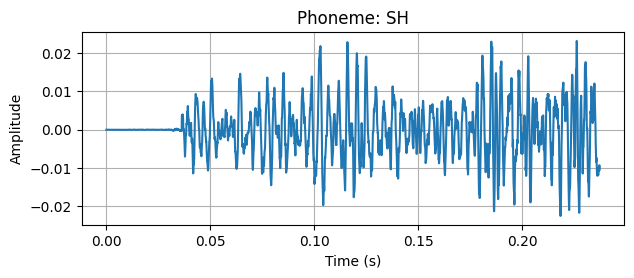

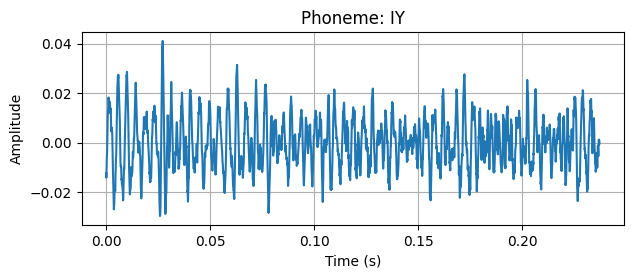

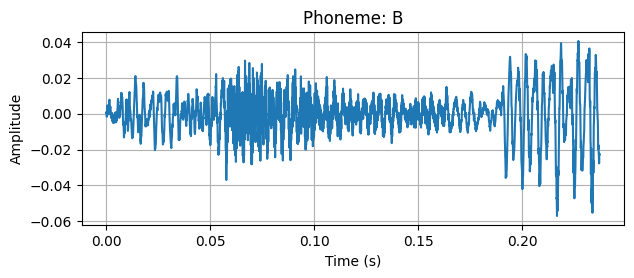

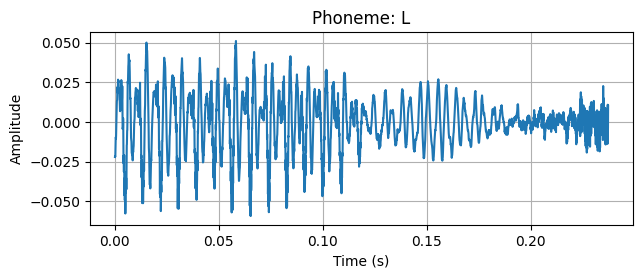

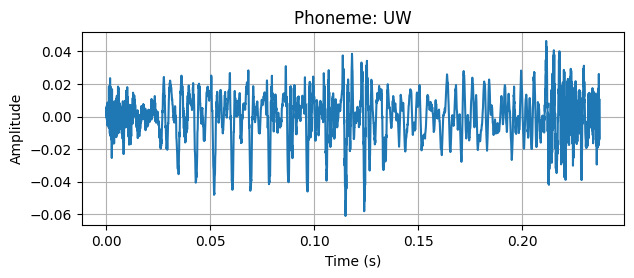


Phoneme Classification:

01  SH   Fricative   0.000s–0.237s
02  IY   Vowel       0.237s–0.474s
03  B    Plosive     0.474s–0.712s
04  L    Semivowel   0.712s–0.949s
05  UW   Vowel       0.949s–1.186s
06  P    Plosive     1.186s–1.423s
07  EH   Vowel       1.423s–1.660s
08  N    Nasal       1.660s–1.897s
09  P    Plosive     1.897s–2.135s
10  UH   Vowel       2.135s–2.372s
11  T    Plosive     2.372s–2.609s
12  IH   Vowel       2.609s–2.846s
13  T    Plosive     2.846s–3.083s
14  AA   Vowel       3.083s–3.320s
15  N    Nasal       3.320s–3.558s
16  DH   Fricative   3.558s–3.795s
17  AH   Vowel       3.795s–4.032s
18  T    Plosive     4.032s–4.269s
19  EY   Vowel       4.269s–4.506s
20  B    Plosive     4.506s–4.744s
21  AH   Vowel       4.744s–4.981s
22  L    Semivowel   4.981s–5.218s
23  AH   Vowel       5.218s–5.455s
24  N    Nasal       5.455s–5.692s
25  D    Plosive     5.692s–5.929s
26  M    Nasal       5.929s–6.167s
27  IH   Vowel       6.167s–6.404s
28  S    Fricative   6.404s–6

In [1]:
!pip install --quiet torch torchaudio librosa transformers phonemizer nltk soundfile
!apt-get update -qq
!apt-get install -y espeak-ng

import nltk
nltk.download("cmudict")

import librosa
import torch
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import re
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from nltk.corpus import cmudict

audio_path = "Ques1.m4a"

waveform_np, sr = librosa.load(audio_path, sr=None, mono=True)
waveform_np = librosa.resample(waveform_np, orig_sr=sr, target_sr=16000)
waveform = torch.tensor(waveform_np)
target_sr = 16000

processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

inputs = processor(waveform_np, sampling_rate=16000, return_tensors="pt", padding=True)

with torch.no_grad():
    logits = model(inputs.input_values).logits

predicted_ids = torch.argmax(logits, dim=-1)
recognized_text = processor.batch_decode(predicted_ids)[0]

print("Recognized Text:\n", recognized_text)

cmu = cmudict.dict()

def normalize_word(word):
    word = word.lower()
    for suf in ["ed", "ly", "s"]:
        if word.endswith(suf) and word[:-len(suf)] in cmu:
            return word[:-len(suf)]
    return word

clean_text = re.sub(r'[^A-Z ]', '', recognized_text.upper())
words = clean_text.split()

phonemes = []
for word in words:
    base = normalize_word(word)
    if base in cmu:
        phonemes.extend(cmu[base][0])

phonemes = [''.join([c for c in p if not c.isdigit()]) for p in phonemes]

print("\nRecognized Phonemes:\n", " ".join(phonemes))

audio_duration = len(waveform) / target_sr
time_per_phoneme = audio_duration / len(phonemes)

phoneme_intervals = []
current_time = 0.0

for ph in phonemes:
    start = current_time
    end = start + time_per_phoneme
    phoneme_intervals.append((ph, start, end))
    current_time = end

for i, (ph, st, et) in enumerate(phoneme_intervals[:5]):
    start_s = int(st * target_sr)
    end_s = int(et * target_sr)
    segment = waveform[start_s:end_s]

    sf.write(f"phoneme_{i+1}_{ph}.wav", segment.numpy(), target_sr)

    t = np.linspace(0, len(segment)/target_sr, len(segment))
    plt.figure(figsize=(7,2.5))
    plt.plot(t, segment.numpy())
    plt.title(f"Phoneme: {ph}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

phoneme_classes = {
    "Vowel": ["AA","AE","AH","AO","AW","AY","EH","ER","EY","IH","IY","OW","OY","UH","UW"],
    "Plosive": ["P","B","T","D","K","G"],
    "Fricative": ["F","V","S","Z","SH","ZH","TH","DH","HH"],
    "Affricate": ["CH","JH"],
    "Semivowel": ["Y","W","R","L"],
    "Nasal": ["M","N","NG"]
}

def classify(ph):
    for k,v in phoneme_classes.items():
        if ph in v:
            return k
    return "Unknown"

print("\nPhoneme Classification:\n")
for i,(ph,st,et) in enumerate(phoneme_intervals):
    print(f"{i+1:02d}  {ph:<3}  {classify(ph):<10}  {st:.3f}s–{et:.3f}s")


Selected Voiced Phoneme: ('IY', 0.23717633928571427, 0.47435267857142854)
Selected Unvoiced Phoneme: ('SH', 0.0, 0.23717633928571427)


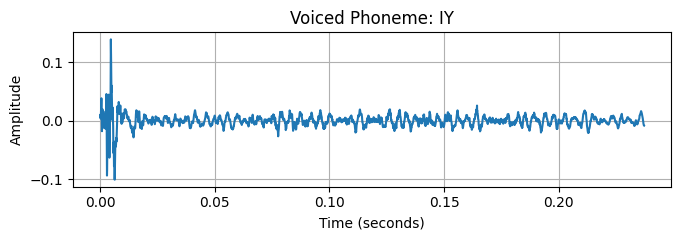

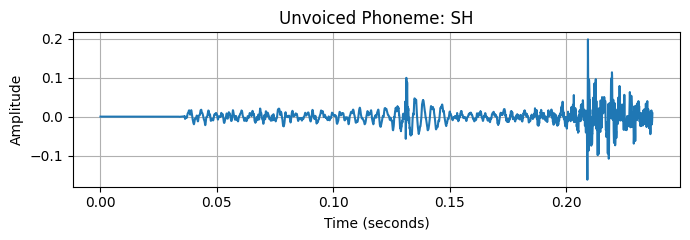

In [3]:
# 5
voiced_phonemes = ["AA","AE","AH","AO","AW","AY","EH","ER","EY",
                   "IH","IY","OW","OY","UH","UW",
                   "L","R","Y","W","M","N","NG","Z","V","DH"]

unvoiced_phonemes = ["S","SH","F","TH","HH","P","T","K"]

voiced_segment = None
unvoiced_segment = None

for phoneme, start_time, end_time in phoneme_intervals:
    if phoneme in voiced_phonemes and voiced_segment is None:
        voiced_segment = (phoneme, start_time, end_time)
    if phoneme in unvoiced_phonemes and unvoiced_segment is None:
        unvoiced_segment = (phoneme, start_time, end_time)

print("Selected Voiced Phoneme:", voiced_segment)
print("Selected Unvoiced Phoneme:", unvoiced_segment)

# Voiced
phoneme, start_time, end_time = voiced_segment

start_sample = int(start_time * target_sr)
end_sample = int(end_time * target_sr)

voiced_wave = waveform[start_sample:end_sample]

time_axis = np.linspace(
    0, len(voiced_wave) / target_sr, len(voiced_wave)
)

plt.figure(figsize=(7, 2.5))
plt.plot(time_axis, voiced_wave)
plt.title(f"Voiced Phoneme: {phoneme}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Unvoiced

phoneme, start_time, end_time = unvoiced_segment

start_sample = int(start_time * target_sr)
end_sample   = int(end_time * target_sr)

unvoiced_wave = waveform[start_sample:end_sample]

time_axis = np.linspace(
    0,
    len(unvoiced_wave) / target_sr,
    len(unvoiced_wave)
)

plt.figure(figsize=(7, 2.5))
plt.plot(time_axis, unvoiced_wave)
plt.title(f"Unvoiced Phoneme: {phoneme}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()



trying with clearer voice

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
espeak-ng is already the newest version (1.50+dfsg-10ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 77 not upgraded.


[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
/tmp/ipython-input-349973657.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  waveform_np, sr = librosa.load(audio_path, sr=None, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Loading weights:   0%|          | 0/212 [00:00<?, ?it/s]

Wav2Vec2ForCTC LOAD REPORT from: facebook/wav2vec2-base-960h
Key                        | Status  | 
---------------------------+---------+-
wav2vec2.masked_spec_embed | MISSING | 

Notes:
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


Recognized Text:
 SHE JUDGED THE BLUPE AND PUT IT ON THE TABLE AND QUIETLY WHISPEREDIES

Recognized Phonemes:
 SH IY JH AH JH D DH AH AH N D P UH T IH T AA N DH AH T EY B AH L AH N D K W AY AH T


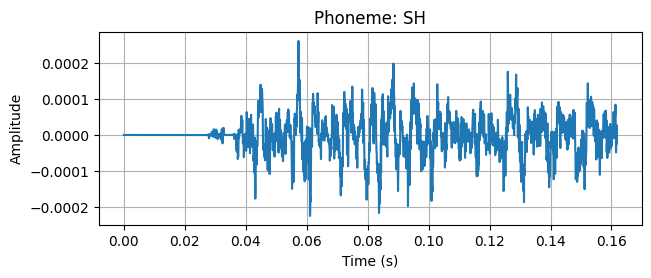

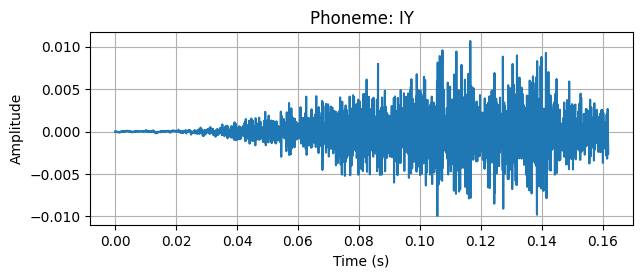

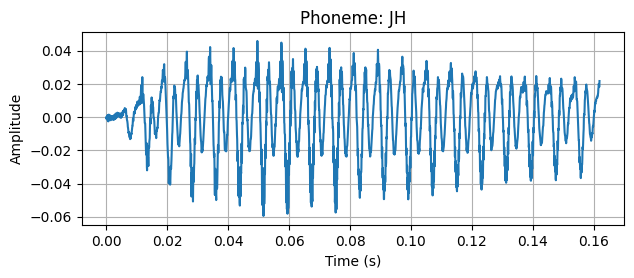

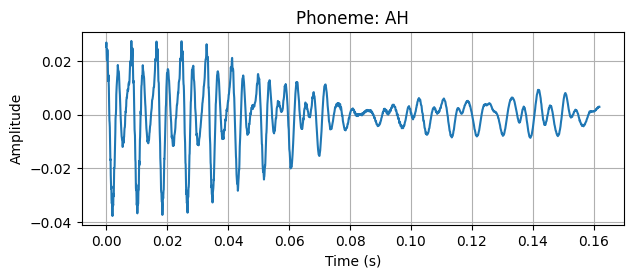

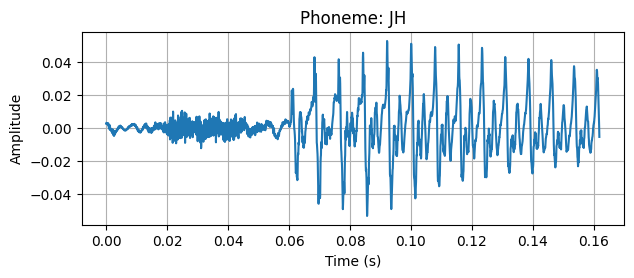


Phoneme Classification:

01  SH   Fricative   0.000s–0.162s
02  IY   Vowel       0.162s–0.324s
03  JH   Affricate   0.324s–0.486s
04  AH   Vowel       0.486s–0.647s
05  JH   Affricate   0.647s–0.809s
06  D    Plosive     0.809s–0.971s
07  DH   Fricative   0.971s–1.133s
08  AH   Vowel       1.133s–1.295s
09  AH   Vowel       1.295s–1.457s
10  N    Nasal       1.457s–1.618s
11  D    Plosive     1.618s–1.780s
12  P    Plosive     1.780s–1.942s
13  UH   Vowel       1.942s–2.104s
14  T    Plosive     2.104s–2.266s
15  IH   Vowel       2.266s–2.428s
16  T    Plosive     2.428s–2.589s
17  AA   Vowel       2.589s–2.751s
18  N    Nasal       2.751s–2.913s
19  DH   Fricative   2.913s–3.075s
20  AH   Vowel       3.075s–3.237s
21  T    Plosive     3.237s–3.399s
22  EY   Vowel       3.399s–3.560s
23  B    Plosive     3.560s–3.722s
24  AH   Vowel       3.722s–3.884s
25  L    Semivowel   3.884s–4.046s
26  AH   Vowel       4.046s–4.208s
27  N    Nasal       4.208s–4.370s
28  D    Plosive     4.370s–4

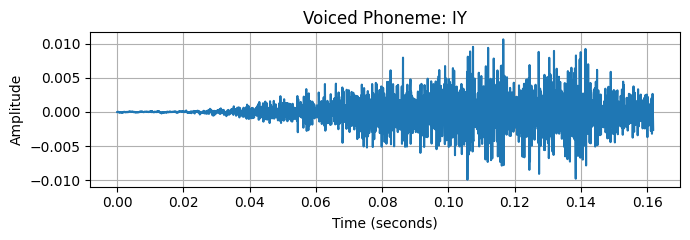

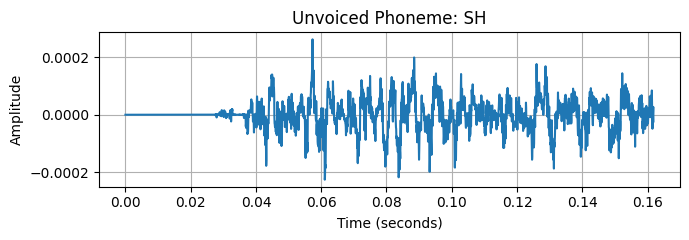

In [6]:
!pip install --quiet torch torchaudio librosa transformers phonemizer nltk soundfile
!apt-get update -qq
!apt-get install -y espeak-ng

import nltk
nltk.download("cmudict")

import librosa
import torch
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import re
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from nltk.corpus import cmudict

audio_path = "Ques1-1.m4a"

waveform_np, sr = librosa.load(audio_path, sr=None, mono=True)
waveform_np = librosa.resample(waveform_np, orig_sr=sr, target_sr=16000)
waveform = torch.tensor(waveform_np)
target_sr = 16000

processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

inputs = processor(waveform_np, sampling_rate=16000, return_tensors="pt", padding=True)

with torch.no_grad():
    logits = model(inputs.input_values).logits

predicted_ids = torch.argmax(logits, dim=-1)
recognized_text = processor.batch_decode(predicted_ids)[0]

print("Recognized Text:\n", recognized_text)

cmu = cmudict.dict()

def normalize_word(word):
    word = word.lower()
    for suf in ["ed", "ly", "s"]:
        if word.endswith(suf) and word[:-len(suf)] in cmu:
            return word[:-len(suf)]
    return word

clean_text = re.sub(r'[^A-Z ]', '', recognized_text.upper())
words = clean_text.split()

phonemes = []
for word in words:
    base = normalize_word(word)
    if base in cmu:
        phonemes.extend(cmu[base][0])

phonemes = [''.join([c for c in p if not c.isdigit()]) for p in phonemes]

print("\nRecognized Phonemes:\n", " ".join(phonemes))

audio_duration = len(waveform) / target_sr
time_per_phoneme = audio_duration / len(phonemes)

phoneme_intervals = []
current_time = 0.0

for ph in phonemes:
    start = current_time
    end = start + time_per_phoneme
    phoneme_intervals.append((ph, start, end))
    current_time = end

for i, (ph, st, et) in enumerate(phoneme_intervals[:5]):
    start_s = int(st * target_sr)
    end_s = int(et * target_sr)
    segment = waveform[start_s:end_s]

    sf.write(f"phoneme_{i+1}_{ph}.wav", segment.numpy(), target_sr)

    t = np.linspace(0, len(segment)/target_sr, len(segment))
    plt.figure(figsize=(7,2.5))
    plt.plot(t, segment.numpy())
    plt.title(f"Phoneme: {ph}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

phoneme_classes = {
    "Vowel": ["AA","AE","AH","AO","AW","AY","EH","ER","EY","IH","IY","OW","OY","UH","UW"],
    "Plosive": ["P","B","T","D","K","G"],
    "Fricative": ["F","V","S","Z","SH","ZH","TH","DH","HH"],
    "Affricate": ["CH","JH"],
    "Semivowel": ["Y","W","R","L"],
    "Nasal": ["M","N","NG"]
}

def classify(ph):
    for k,v in phoneme_classes.items():
        if ph in v:
            return k
    return "Unknown"

print("\nPhoneme Classification:\n")
for i,(ph,st,et) in enumerate(phoneme_intervals):
    print(f"{i+1:02d}  {ph:<3}  {classify(ph):<10}  {st:.3f}s–{et:.3f}s")
# 5
voiced_phonemes = ["AA","AE","AH","AO","AW","AY","EH","ER","EY",
                   "IH","IY","OW","OY","UH","UW",
                   "L","R","Y","W","M","N","NG","Z","V","DH"]

unvoiced_phonemes = ["S","SH","F","TH","HH","P","T","K"]

voiced_segment = None
unvoiced_segment = None

for phoneme, start_time, end_time in phoneme_intervals:
    if phoneme in voiced_phonemes and voiced_segment is None:
        voiced_segment = (phoneme, start_time, end_time)
    if phoneme in unvoiced_phonemes and unvoiced_segment is None:
        unvoiced_segment = (phoneme, start_time, end_time)

print("Selected Voiced Phoneme:", voiced_segment)
print("Selected Unvoiced Phoneme:", unvoiced_segment)

# Voiced
phoneme, start_time, end_time = voiced_segment

start_sample = int(start_time * target_sr)
end_sample = int(end_time * target_sr)

voiced_wave = waveform[start_sample:end_sample]

time_axis = np.linspace(
    0, len(voiced_wave) / target_sr, len(voiced_wave)
)

plt.figure(figsize=(7, 2.5))
plt.plot(time_axis, voiced_wave)
plt.title(f"Voiced Phoneme: {phoneme}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Unvoiced

phoneme, start_time, end_time = unvoiced_segment

start_sample = int(start_time * target_sr)
end_sample   = int(end_time * target_sr)

unvoiced_wave = waveform[start_sample:end_sample]

time_axis = np.linspace(
    0,
    len(unvoiced_wave) / target_sr,
    len(unvoiced_wave)
)

plt.figure(figsize=(7, 2.5))
plt.plot(time_axis, unvoiced_wave)
plt.title(f"Unvoiced Phoneme: {phoneme}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()




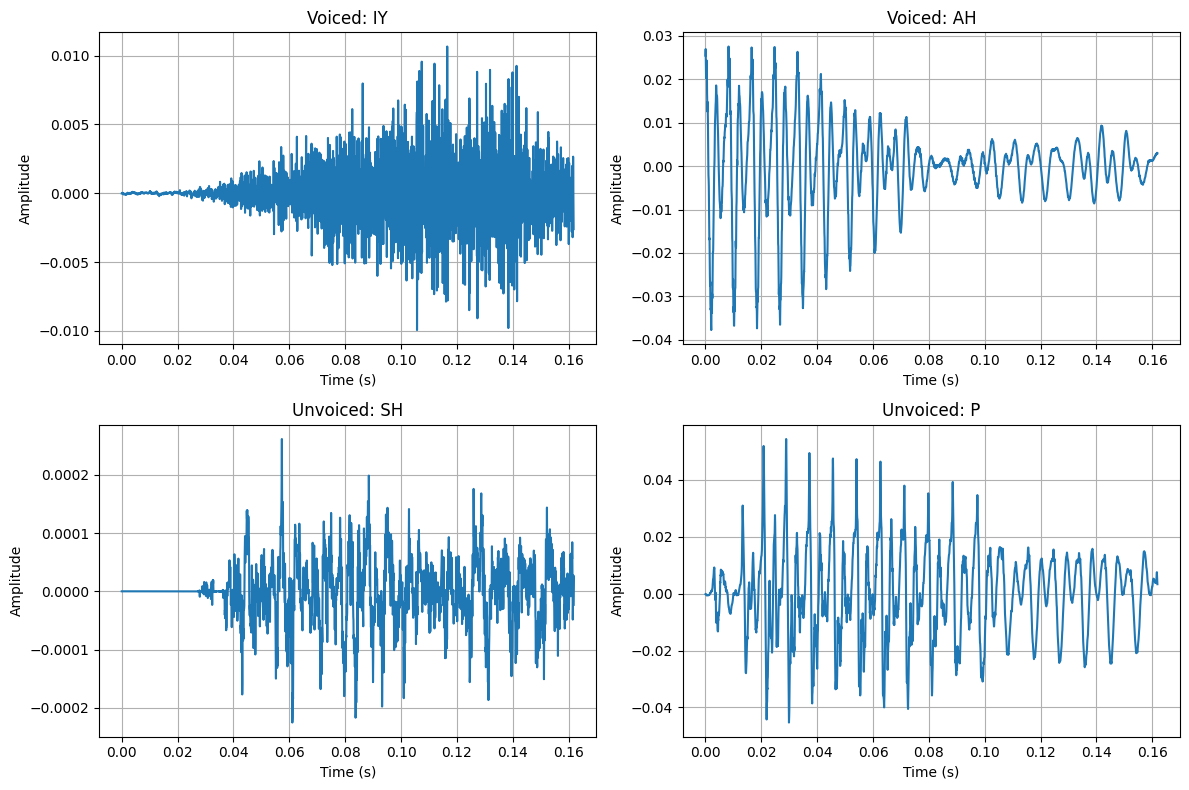

In [9]:
voiced_segments = []
unvoiced_segments = []

for phoneme, start_time, end_time in phoneme_intervals:
    if phoneme in voiced_phonemes and len(voiced_segments) < 2:
        voiced_segments.append((phoneme, start_time, end_time))
    elif phoneme in unvoiced_phonemes and len(unvoiced_segments) < 2:
        unvoiced_segments.append((phoneme, start_time, end_time))

plt.figure(figsize=(12, 8))

plot_index = 1

for phoneme, start_time, end_time in voiced_segments + unvoiced_segments:
    start_sample = int(start_time * target_sr)
    end_sample   = int(end_time * target_sr)

    segment = waveform[start_sample:end_sample]
    time_axis = np.linspace(0, len(segment) / target_sr, len(segment))

    plt.subplot(2, 2, plot_index)
    plt.plot(time_axis, segment)
    plt.title(f"{'Voiced' if phoneme in voiced_phonemes else 'Unvoiced'}: {phoneme}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    plot_index += 1

plt.tight_layout()
plt.show()


[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
/tmp/ipython-input-3939789541.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  waveform, target_sr = librosa.load("Ques2.m4a", sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


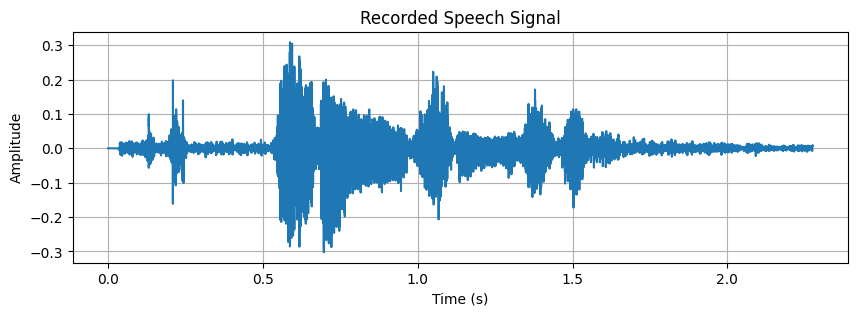

Loading weights:   0%|          | 0/212 [00:00<?, ?it/s]

Wav2Vec2ForCTC LOAD REPORT from: facebook/wav2vec2-base-960h
Key                        | Status  | 
---------------------------+---------+-
wav2vec2.masked_spec_embed | MISSING | 

Notes:
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


Recognized Text:
 SHE TSU

Fricatives: ['SH', 'S']
Approximants: []


Loading weights:   0%|          | 0/212 [00:00<?, ?it/s]

Wav2Vec2ForCTC LOAD REPORT from: facebook/wav2vec2-base-960h
Key                        | Status  | 
---------------------------+---------+-
wav2vec2.masked_spec_embed | MISSING | 

Notes:
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.



Word Time Intervals:

SHE (np.float64(0.6), np.float64(0.78))
TSU (np.float64(1.06), np.float64(1.6))


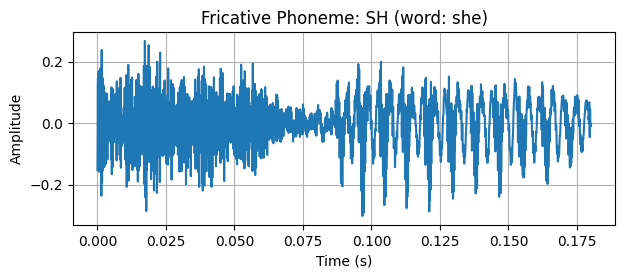

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import torch
import re
import nltk
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC, pipeline
from nltk.corpus import cmudict

nltk.download("cmudict")

waveform, target_sr = librosa.load("Ques2.m4a", sr=16000, mono=True)

t = np.linspace(0, len(waveform)/target_sr, len(waveform))
plt.figure(figsize=(10,3))
plt.plot(t, waveform)
plt.title("Recorded Speech Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

inputs = processor(waveform, sampling_rate=16000, return_tensors="pt", padding=True)

with torch.no_grad():
    logits = model(inputs.input_values).logits

predicted_ids = torch.argmax(logits, dim=-1)
recognized_text = processor.batch_decode(predicted_ids)[0]

print("Recognized Text:\n", recognized_text)

cmu = cmudict.dict()

words = re.sub(r'[^A-Z ]','',recognized_text.upper()).split()
phonemes = []

for w in words:
    if w.lower() in cmu:
        phonemes.extend(cmu[w.lower()][0])

phonemes = [''.join([c for c in p if not c.isdigit()]) for p in phonemes]

fricatives = ["S","SH","Z"]
approximants = ["Y"]

print("\nFricatives:", [p for p in phonemes if p in fricatives])
print("Approximants:", [p for p in phonemes if p in approximants])

asr = pipeline(
    "automatic-speech-recognition",
    model="facebook/wav2vec2-base-960h",
    return_timestamps="word"
)

result = asr(waveform)

print("\nWord Time Intervals:\n")
for c in result["chunks"]:
    print(c["text"], c["timestamp"])

word_intervals = {
    "she":  ("SH","Fricative"),
    "sees": ("S","Fricative"),
    "you":  ("Y","Approximant")
}

for chunk in result["chunks"]:
    word = chunk["text"].lower()
    if word in word_intervals:
        ph, cat = word_intervals[word]
        st, et = chunk["timestamp"]

        s = int(st * target_sr)
        e = int(et * target_sr)
        seg = waveform[s:e]

        t = np.linspace(0, len(seg)/target_sr, len(seg))
        plt.figure(figsize=(7,2.5))
        plt.plot(t, seg)
        plt.title(f"{cat} Phoneme: {ph} (word: {word})")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.show()


[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
/tmp/ipython-input-4182084651.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  waveform, target_sr = librosa.load("Ques2-1.m4a", sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


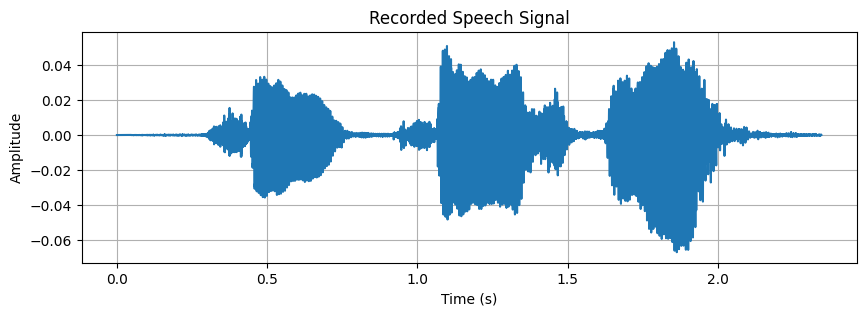

Loading weights:   0%|          | 0/212 [00:00<?, ?it/s]

Wav2Vec2ForCTC LOAD REPORT from: facebook/wav2vec2-base-960h
Key                        | Status  | 
---------------------------+---------+-
wav2vec2.masked_spec_embed | MISSING | 

Notes:
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


Recognized Text:
 SHE SEES VEW

Fricatives: ['SH', 'S', 'Z']
Approximants: []


Loading weights:   0%|          | 0/212 [00:00<?, ?it/s]

Wav2Vec2ForCTC LOAD REPORT from: facebook/wav2vec2-base-960h
Key                        | Status  | 
---------------------------+---------+-
wav2vec2.masked_spec_embed | MISSING | 

Notes:
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.



Word Time Intervals:

SHE (np.float64(0.36), np.float64(0.54))
SEES (np.float64(1.0), np.float64(1.4))
VEW (np.float64(1.62), np.float64(1.84))


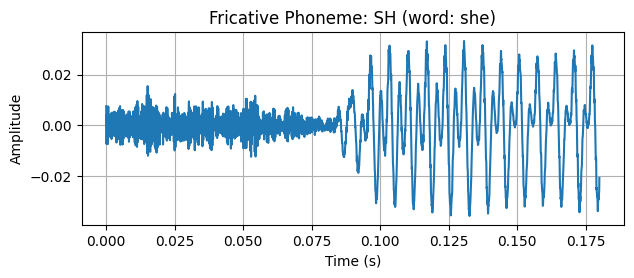

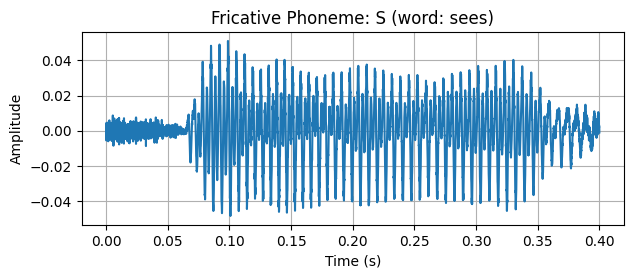

In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import torch
import re
import nltk
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC, pipeline
from nltk.corpus import cmudict

nltk.download("cmudict")

waveform, target_sr = librosa.load("Ques2-1.m4a", sr=16000, mono=True)

t = np.linspace(0, len(waveform)/target_sr, len(waveform))
plt.figure(figsize=(10,3))
plt.plot(t, waveform)
plt.title("Recorded Speech Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

inputs = processor(waveform, sampling_rate=16000, return_tensors="pt", padding=True)

with torch.no_grad():
    logits = model(inputs.input_values).logits

predicted_ids = torch.argmax(logits, dim=-1)
recognized_text = processor.batch_decode(predicted_ids)[0]

print("Recognized Text:\n", recognized_text)

cmu = cmudict.dict()

words = re.sub(r'[^A-Z ]','',recognized_text.upper()).split()
phonemes = []

for w in words:
    if w.lower() in cmu:
        phonemes.extend(cmu[w.lower()][0])

phonemes = [''.join([c for c in p if not c.isdigit()]) for p in phonemes]

fricatives = ["S","SH","Z"]
approximants = ["Y"]

print("\nFricatives:", [p for p in phonemes if p in fricatives])
print("Approximants:", [p for p in phonemes if p in approximants])

asr = pipeline(
    "automatic-speech-recognition",
    model="facebook/wav2vec2-base-960h",
    return_timestamps="word"
)

result = asr(waveform)

print("\nWord Time Intervals:\n")
for c in result["chunks"]:
    print(c["text"], c["timestamp"])

word_intervals = {
    "she":  ("SH","Fricative"),
    "sees": ("S","Fricative"),
    "you":  ("Y","Approximant")
}

for chunk in result["chunks"]:
    word = chunk["text"].lower()
    if word in word_intervals:
        ph, cat = word_intervals[word]
        st, et = chunk["timestamp"]

        s = int(st * target_sr)
        e = int(et * target_sr)
        seg = waveform[s:e]

        t = np.linspace(0, len(seg)/target_sr, len(seg))
        plt.figure(figsize=(7,2.5))
        plt.plot(t, seg)
        plt.title(f"{cat} Phoneme: {ph} (word: {word})")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.show()


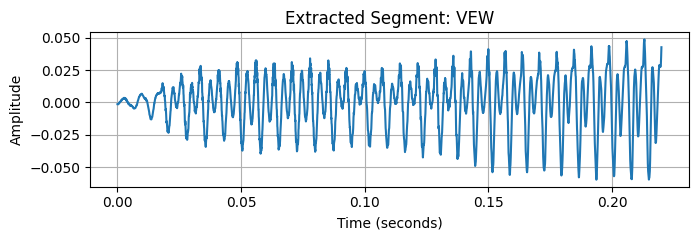

In [5]:
for chunk in result["chunks"]:
    if chunk["text"].lower() == "vew":
        st, et = chunk["timestamp"]

        start_sample = int(st * target_sr)
        end_sample   = int(et * target_sr)

        vew_segment = waveform[start_sample:end_sample]

        t = np.linspace(0, len(vew_segment) / target_sr, len(vew_segment))

        plt.figure(figsize=(7, 2.5))
        plt.plot(t, vew_segment)
        plt.title("Extracted Segment: VEW")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
